# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.dtypes
#Las columnas se entienden fácilmente; todas están en el formato "correcto" —podrían ser enteros para ahorrar 
#memoria

#No hay variables categóricas que transformar

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [4]:
customers.isnull().sum()
#No hay nulos tampoco

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
customers.corr()
#La única correlación relativamente preocupante es la de grocery con detergents_paper; p= .924641

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
customers.shape

(440, 8)

In [7]:
#para ver lo de Pareto hago una suma primero
customers['total_sales'] = customers['Fresh'] + customers['Milk'] + customers['Grocery'] + customers['Frozen'] + customers['Detergents_Paper']+ customers['Delicassen']
customers.total_sales.value_counts()

29025    2
32880    1
37219    1
18767    1
31185    1
        ..
24546    1
62163    1
28372    1
12748    1
31744    1
Name: total_sales, Length: 439, dtype: int64

In [8]:
customers['cum_sum'] = customers.total_sales.cumsum()/customers.total_sales.sum()
customers['pct'] = customers.total_sales / customers.total_sales.sum()
lista = customers.pct.value_counts().index
lista = sorted(lista)
lista = lista[-88:]
print(sum(lista))
#No sigue una distribución Pareto esta tabla de consumidores. 
#El 20% que más compra representa el 43% de todas las compras, pero no el 80%

0.42904839426792973


In [9]:
lista = customers.pct.sort_values(ascending=False)
print(sum(lista[:88]))
#Otra manera de comprobarlo. Mismo número. 


0.4290483942679299


In [10]:
print(sum(lista[:440]))
#Este es el total, obviamente. 

1.0000000000000009


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'total_sales', 'cum_sum', 'pct'],
      dtype='object')

In [12]:
# Your code here
#Solo quitaré las columnas que me inventé por lo de Pareto. 

customers = customers.drop(columns=['cum_sum', 'total_sales', 'pct'])

In [13]:
# Your comment here
#El resto las veo bien. Aunque hay un par medio correlacionadas, primero quiero ver los resultados del modelo.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [29]:
# Your import here:

from sklearn.preprocessing import StandardScaler

customers_scale = StandardScaler().fit_transform(customers)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [30]:
# Your code here:

from sklearn.cluster import KMeans

In [31]:
k_means = KMeans()

In [32]:
k_means.fit(customers_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Count the values in `labels`.

In [33]:
# Your code here:
customers['labels'] = k_means.labels_


In [34]:
customers.labels.value_counts()

5    175
2     93
0     87
1     41
7     36
3      5
6      2
4      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [37]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Count the values in `labels_DBSCAN`.

In [40]:
# Your code here
customers['labels_DBSCAN'] = dbscan.labels_
customers.labels_DBSCAN.value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [41]:
customers.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,2,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,5,1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
5,2,3,9413,8259,5126,666,1795,1451,2,-1
6,2,3,12126,3199,6975,480,3140,545,2,0
7,2,3,7579,4956,9426,1669,3321,2566,2,-1
8,1,3,5963,3648,6192,425,1716,750,5,1
9,2,3,6006,11093,18881,1159,7425,2098,2,-1


Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

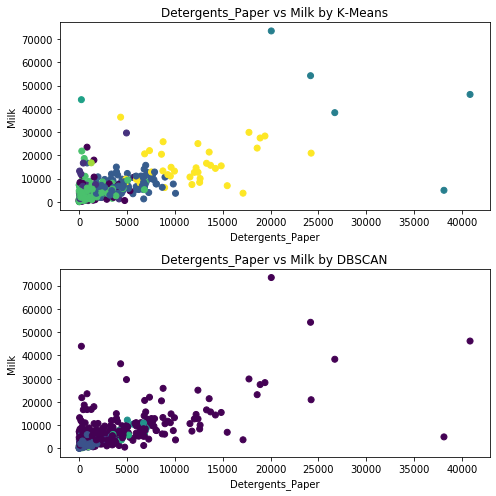

In [63]:
# Your code here:

fig, axs = plt.subplots(2, figsize=(7,7))


#Labels. 
axs[0].scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels)
axs[0].set_title("Detergents_Paper vs Milk by K-Means")

axs[1].scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels_DBSCAN)
axs[1].set_title("Detergents_Paper vs Milk by DBSCAN")
for ax in axs.flat:
    ax.set(xlabel='Detergents_Paper', ylabel='Milk')

plt.tight_layout();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

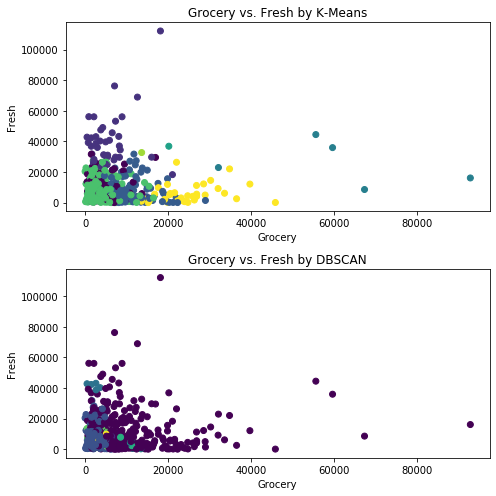

In [64]:
# Your code here:
fig, axs = plt.subplots(2, figsize=(7,7))


#Labels. 
axs[0].scatter(customers.Grocery, customers.Fresh, c=customers.labels)
axs[0].set_title("Grocery vs. Fresh by K-Means")

axs[1].scatter(customers.Grocery, customers.Fresh, c=customers.labels_DBSCAN)
axs[1].set_title("Grocery vs. Fresh by DBSCAN")
for ax in axs.flat:
    ax.set(xlabel='Grocery', ylabel='Fresh')

plt.tight_layout();


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

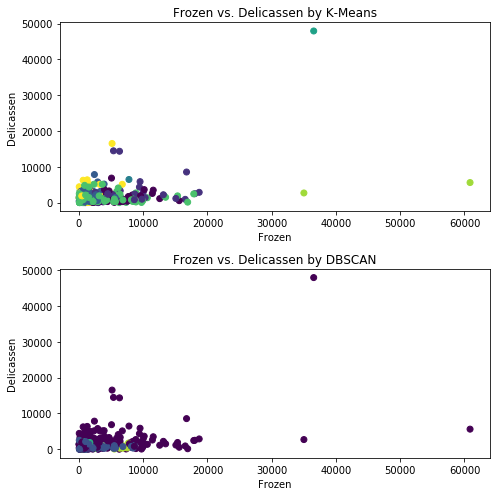

In [65]:
# Your code here:
fig, axs = plt.subplots(2, figsize=(7,7))


#Labels. 
axs[0].scatter(customers.Frozen, customers.Delicassen, c=customers.labels)
axs[0].set_title("Frozen vs. Delicassen by K-Means")

axs[1].scatter(customers.Frozen, customers.Delicassen, c=customers.labels_DBSCAN)
axs[1].set_title("Frozen vs. Delicassen by DBSCAN")
for ax in axs.flat:
    ax.set(xlabel='Frozen', ylabel='Delicassen')

plt.tight_layout();


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [71]:
# Your code here:
v1 = customers.groupby('labels').agg('mean')
v1.mean()

Channel                 1.389718
Region                  2.550086
Fresh               19713.975456
Milk                16474.972648
Grocery             17366.087570
Frozen              12830.011442
Detergents_Paper     6240.729521
Delicassen           7928.958748
labels_DBSCAN          -0.371100
dtype: float64

In [72]:
v2 = customers.groupby('labels_DBSCAN').agg('mean')
v2.mean()

Channel                 1.387800
Region                  2.383442
Fresh               11698.532697
Milk                 4081.427279
Grocery              5882.182662
Frozen               2266.172205
Detergents_Paper     2248.222544
Delicassen            943.150826
labels                  1.633250
dtype: float64

In [73]:
customers.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
labels                  3.147727
labels_DBSCAN           0.247727
dtype: float64

Which algorithm appears to perform better?

In [23]:
# Your observations here
"""
Comparando las medias de ambas estrategias con las originales, vemos que ninguna es taaan precisa,
aunque la de DBSCAN se acerca mucho más en la mayoría de las columnas. Por lo tanto, yo me iría con ese algoritmo.

"""


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [75]:
# Your code here
k_means = KMeans(n_clusters=5)
k_means.fit(customers_scale)
customers['labels'] = k_means.labels_


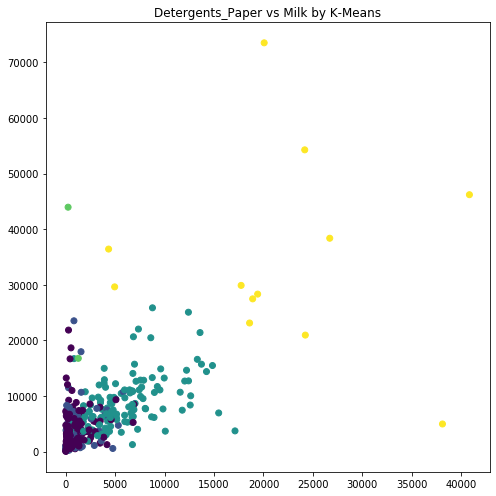

In [77]:
fig, axs = plt.subplots(1, figsize=(7,7))


#Labels. 
axs.scatter(customers.Detergents_Paper, customers.Milk, c=customers.labels)
axs.set_title("Detergents_Paper vs Milk by K-Means")

plt.tight_layout();

#Se ve un poco mejor con 5 clusters que con 8. 

In [25]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [92]:
# Your code here

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(customers_scale)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [93]:
customers['labels_DBSCAN'] = dbscan.labels_

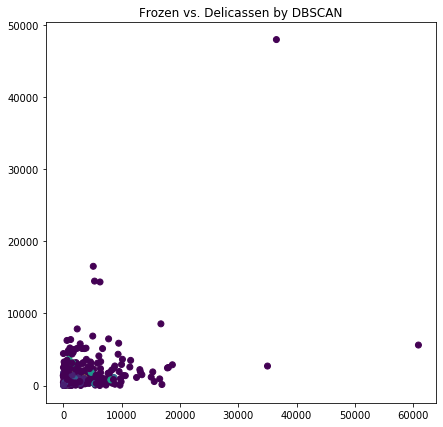

In [94]:
fig, axs = plt.subplots(1, figsize=(7,7))

axs.scatter(customers.Frozen, customers.Delicassen, c=customers.labels_DBSCAN)
axs.set_title("Frozen vs. Delicassen by DBSCAN")
plt.show();

In [ ]:
#Un poco raro. 